In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Drivers License Data.csv")
df.head()

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
0,AID0001,Male,Young Adult,Other,NaN,38.48,30.29,37.03,33.53,39.61,58.16,53.42,35.32,38.19,70.68,Average,No
1,AID0002,Female,Young Adult,Black,NaN,51.76,19.13,63.05,34.87,19.56,16.48,27.97,22.91,24.23,78.18,Average,No
2,AID0003,Male,Middle Age,Black,NaN,30.21,48.13,43.13,42.43,60.93,20.74,28.86,32.32,44.11,79.60,Fast,Yes
3,AID0004,Male,Young Adult,Other,NaN,34.75,47.28,50.49,42.10,22.52,33.87,48.52,24.90,37.56,57.34,Average,No
4,AID0005,Male,Teenager,Other,Advanced,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,Average,Yes


In [3]:
df.shape

(500, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Applicant ID   500 non-null    object 
 1   Gender         500 non-null    object 
 2   Age Group      500 non-null    object 
 3   Race           500 non-null    object 
 4   Training       350 non-null    object 
 5   Signals        500 non-null    float64
 6   Yield          500 non-null    float64
 7   Speed Control  500 non-null    float64
 8   Night Drive    500 non-null    float64
 9   Road Signs     500 non-null    float64
 10  Steer Control  500 non-null    float64
 11  Mirror Usage   500 non-null    float64
 12  Confidence     500 non-null    float64
 13  Parking        500 non-null    float64
 14  Theory Test    500 non-null    float64
 15  Reactions      500 non-null    object 
 16  Qualified      500 non-null    object 
dtypes: float64(10), object(7)
memory usage: 66.5+ KB


In [5]:
df.describe()

,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,48.525460,47.784000,47.931740,47.877760,47.793440,47.429480,48.157580,47.654440,48.452360,70.623380
std,16.294927,16.062178,15.601242,15.302693,16.042885,15.580004,15.459866,16.056021,15.705702,17.864177
min,0.770000,0.000000,0.000000,1.740000,0.000000,0.000000,0.000000,5.120000,0.000000,40.100000
25%,38.097500,36.915000,37.297500,37.387500,36.547500,37.340000,38.355000,37.020000,37.460000,54.920000
50%,48.415000,48.950000,49.405000,48.160000,49.310000,48.220000,48.360000,48.255000,49.400000,69.855000
75%,59.357500,58.977500,58.392500,58.792500,58.772500,57.515000,58.795000,59.027500,59.262500,86.685000
max,95.610000,94.410000,89.430000,89.930000,88.870000,89.240000,90.770000,90.280000,88.360000,99.750000


In [7]:
num_df = df.select_dtypes(include=[np.number])
skew_kurt = pd.DataFrame({
    "Skewness": num_df.skew(),
    "Kurtosis": num_df.kurt()
})
print("\n--- Skewness & Kurtosis ---")
print(skew_kurt)


--- Skewness & Kurtosis ---
               Skewness  Kurtosis
Signals       -0.113371 -0.076906
Yield         -0.220841 -0.000514
Speed Control -0.240397  0.112417
Night Drive   -0.167597 -0.152233
Road Signs    -0.227364 -0.191369
Steer Control -0.141525 -0.129933
Mirror Usage  -0.221527  0.010099
Confidence    -0.145087 -0.097284
Parking       -0.229114 -0.189619
Theory Test   -0.034659 -1.263861


In [8]:
print(num_df.columns)

Index(['Signals', 'Yield', 'Speed Control', 'Night Drive', 'Road Signs',
       'Steer Control', 'Mirror Usage', 'Confidence', 'Parking',
       'Theory Test'],
      dtype='object')


In [13]:
skewness_values = num_df.skew()

pearson_skew = 3 * (num_df.mean() - num_df.median()) / num_df.std()

# Combine into one DataFrame
skew_summary = pd.DataFrame({
    "Skewness (Moment)": skewness_values,
    "Pearson Skew (Mean-Median)": pearson_skew
})

print("\n--- Skewness Summary ---")
print(skew_summary)


--- Skewness Summary ---
               Skewness (Moment)  Pearson Skew (Mean-Median)
Signals                -0.113371                    0.020336
Yield                  -0.220841                   -0.217779
Speed Control          -0.240397                   -0.283297
Night Drive            -0.167597                   -0.055331
Road Signs             -0.227364                   -0.283595
Steer Control          -0.141525                   -0.152218
Mirror Usage           -0.221527                   -0.039280
Confidence             -0.145087                   -0.112212
Parking                -0.229114                   -0.181012
Theory Test            -0.034659                    0.129037


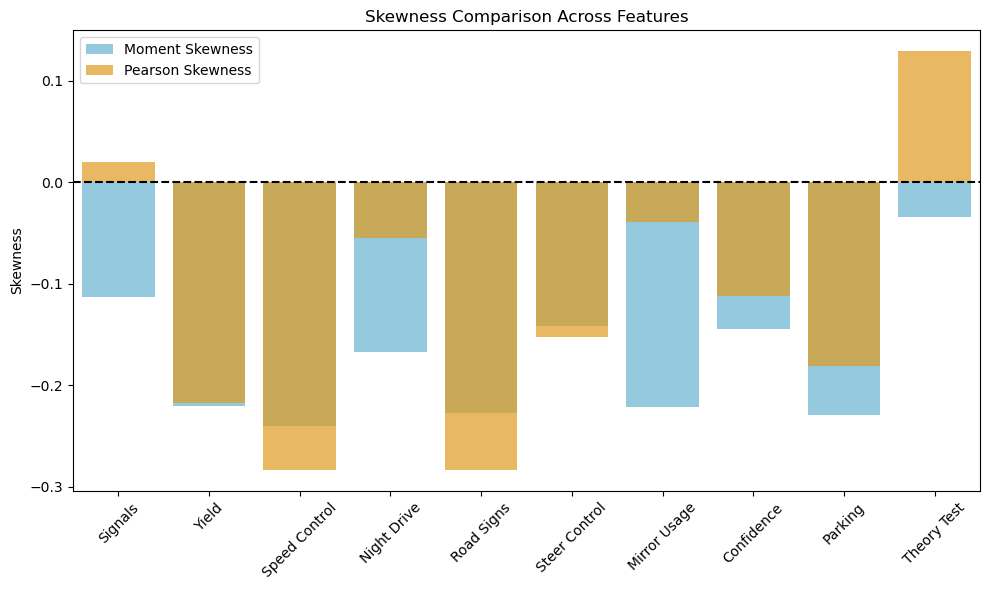

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=skew_summary.index, y=skew_summary["Skewness (Moment)"], color="skyblue", label="Moment Skewness")
sns.barplot(x=skew_summary.index, y=skew_summary["Pearson Skew (Mean-Median)"], color="orange", alpha=0.7, label="Pearson Skewness")

plt.axhline(0, color="black", linestyle="--")
plt.xticks(rotation=45)
plt.ylabel("Skewness")
plt.title("Skewness Comparison Across Features")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


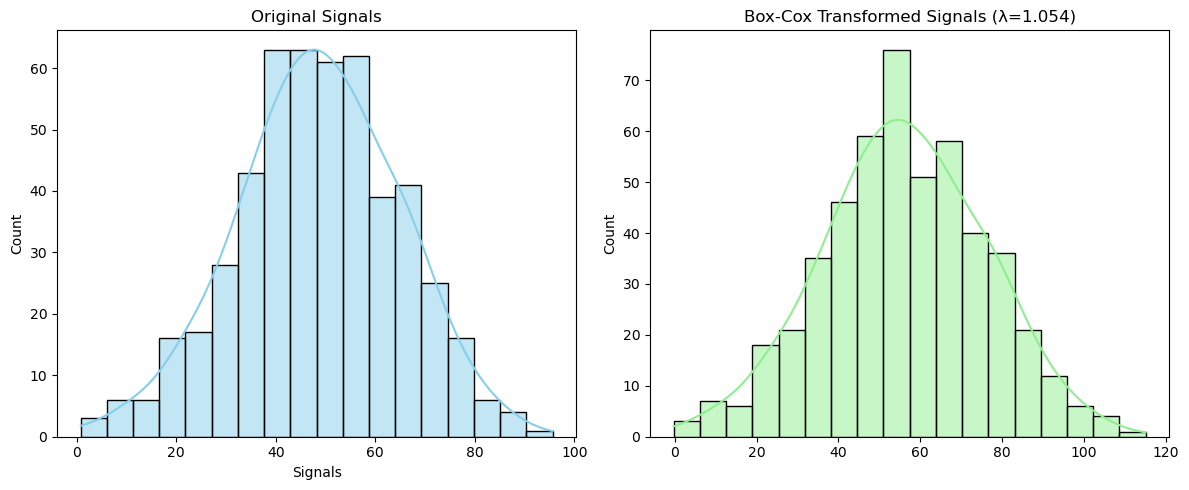

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


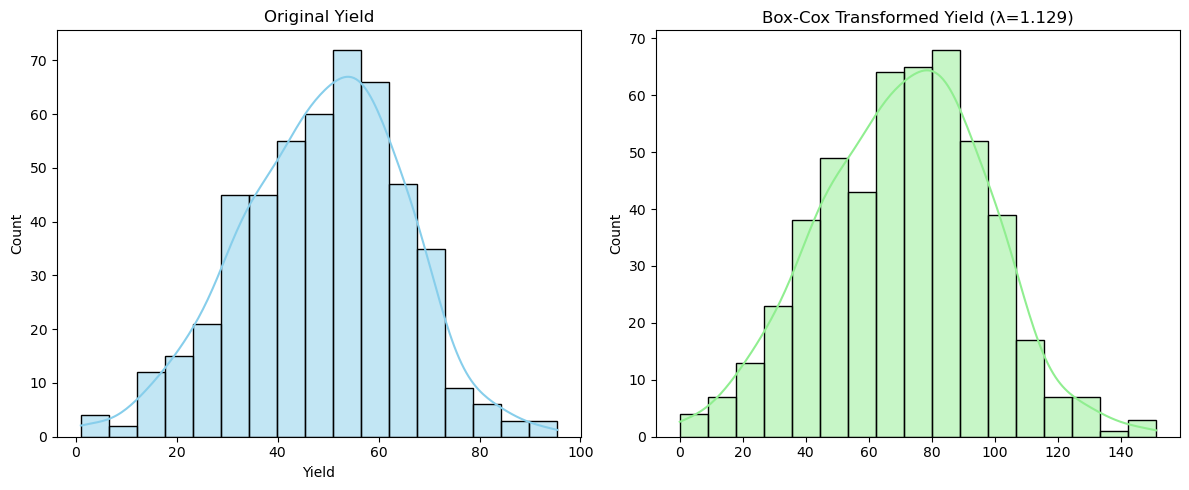

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


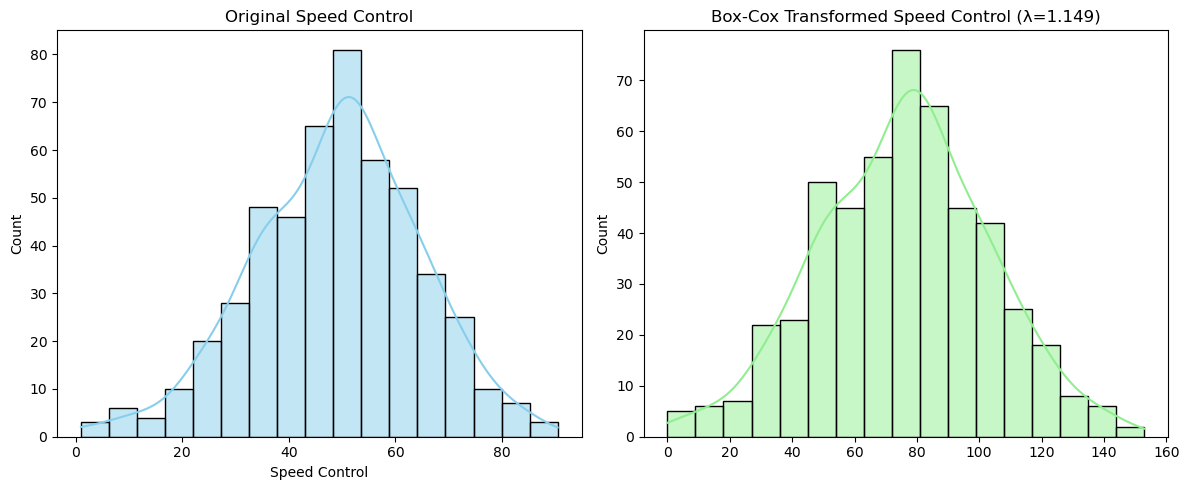

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


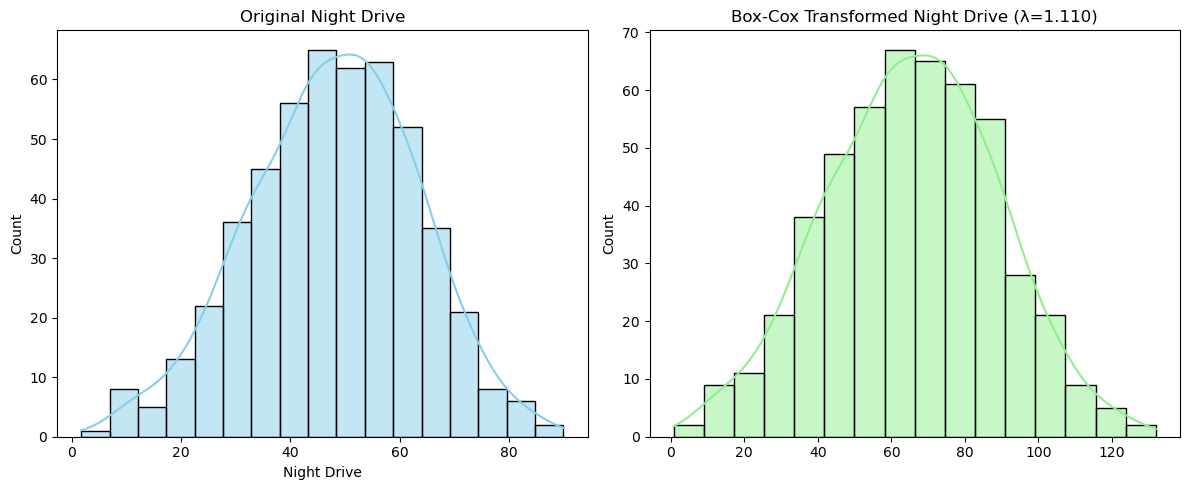

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


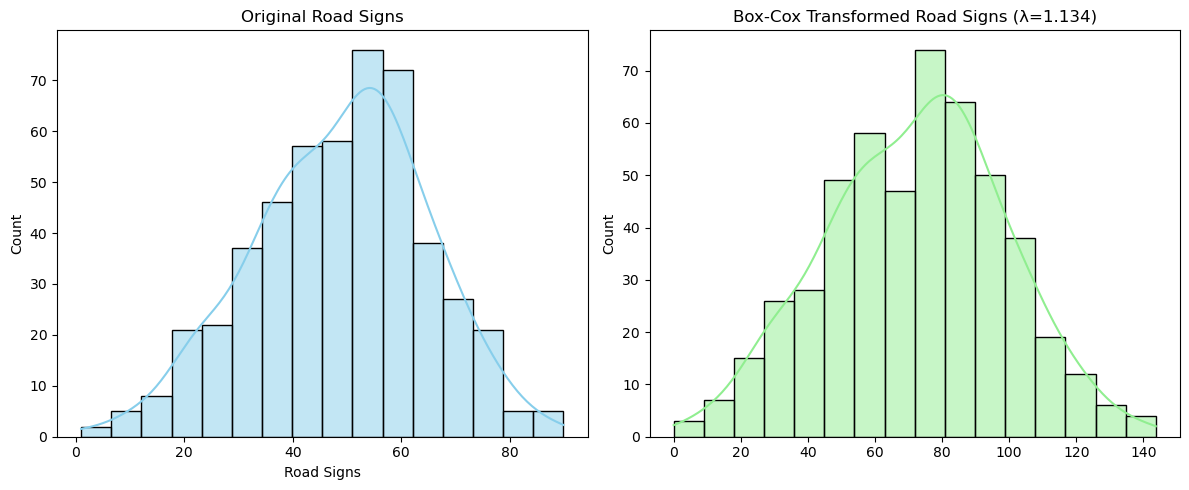

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


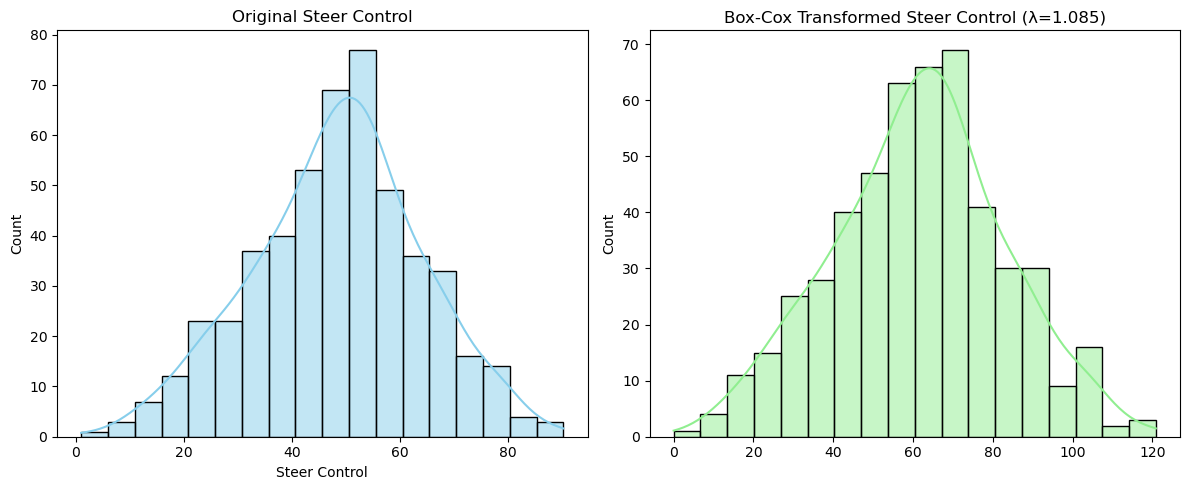

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


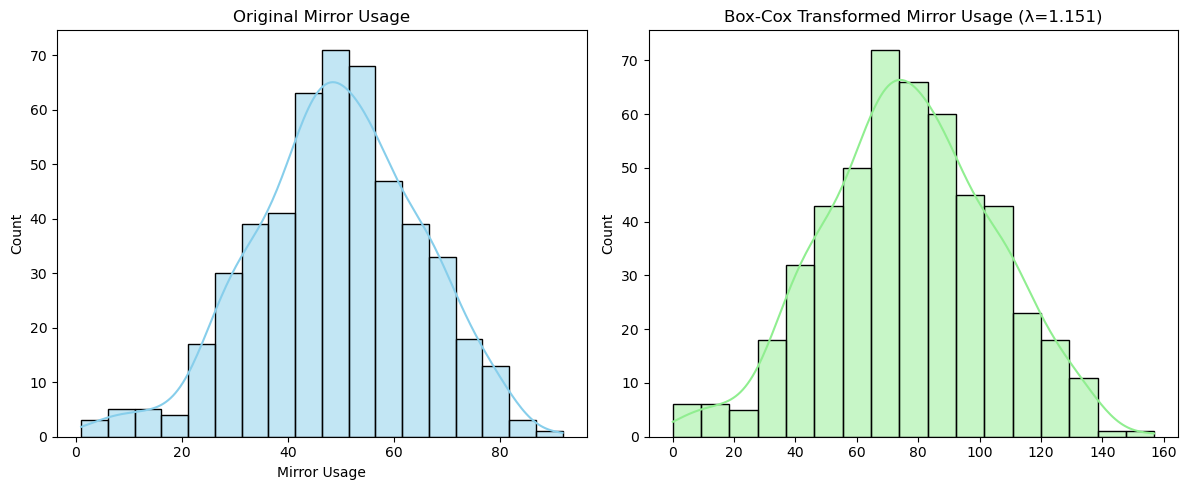

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


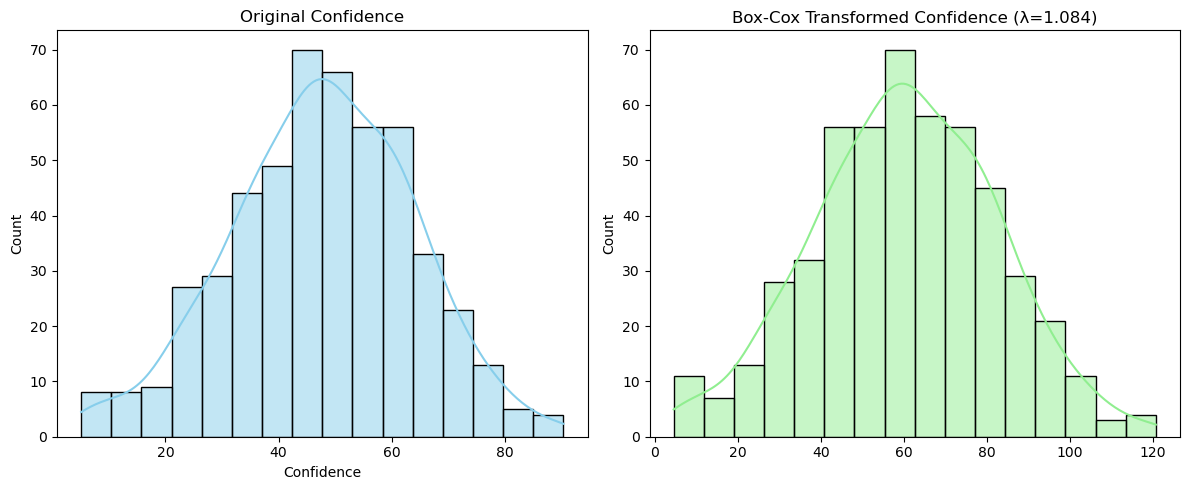

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


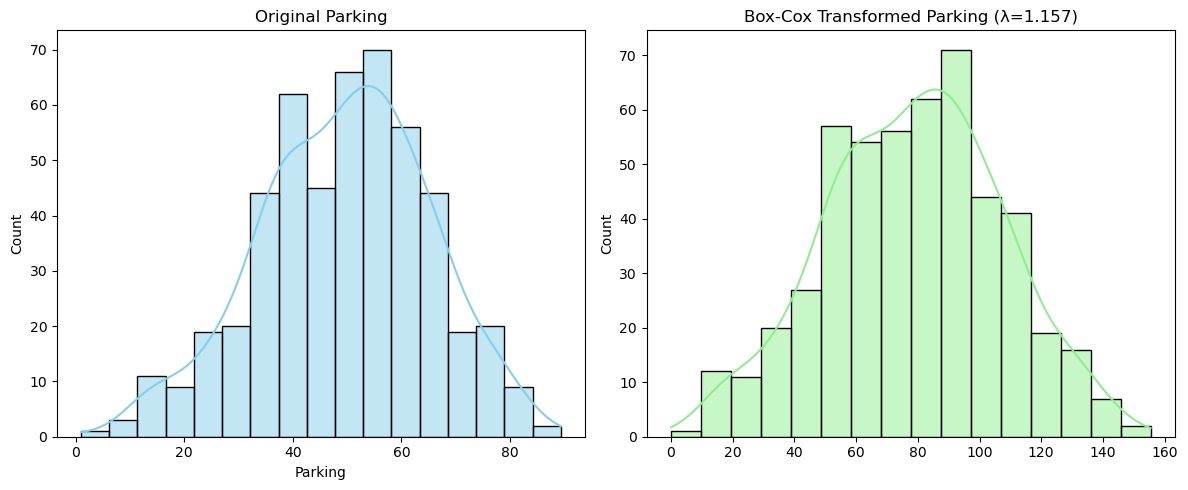

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


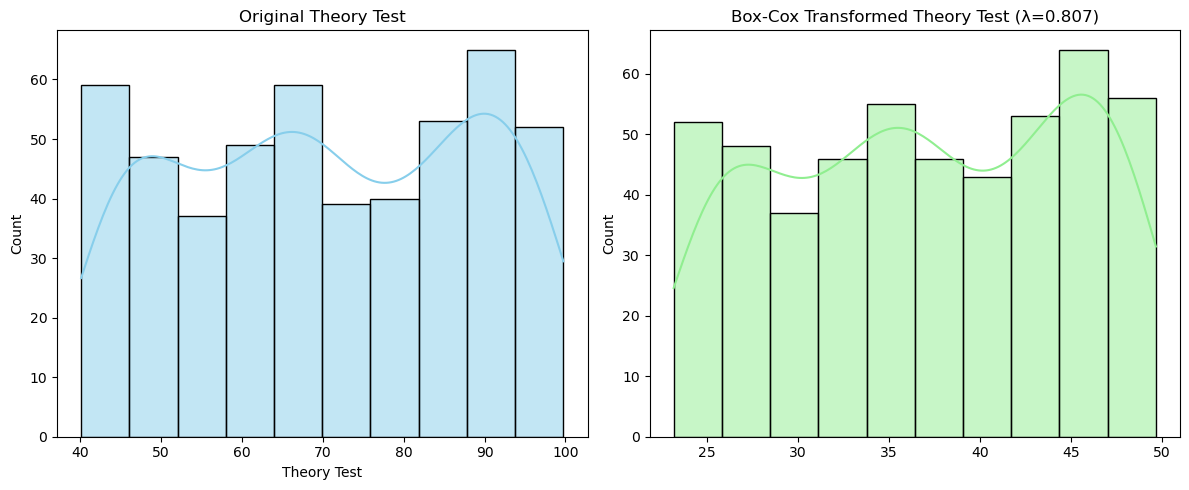

In [11]:
boxcox_results = {}

for col in num_df.columns:
    data = num_df[col].dropna()  # drop NaN
    
    # Ensure strictly positive (Box-Cox requires > 0)
    if (data <= 0).any():
        data = data - data.min() + 1
    
    # Apply Box-Cox
    transformed, lambda_val = boxcox(data)
    boxcox_results[col] = {
        "lambda": lambda_val,
        "original_mean": data.mean(),
        "transformed_mean": transformed.mean()
    }
    
    # Plot comparison
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(data, kde=True, color="skyblue")
    plt.title(f"Original {col}")
    
    plt.subplot(1,2,2)
    sns.histplot(transformed, kde=True, color="lightgreen")
    plt.title(f"Box-Cox Transformed {col} (λ={lambda_val:.3f})")
    
    plt.tight_layout()
    plt.show()


In [12]:
# Show summary of lambda values
boxcox_summary = pd.DataFrame(boxcox_results).T
print("\n--- Box-Cox Transformation Summary ---")
print(boxcox_summary)


--- Box-Cox Transformation Summary ---
                 lambda  original_mean  transformed_mean
Signals        1.053760       48.52546         55.984307
Yield          1.129120       48.78400         71.098672
Speed Control  1.148612       48.93174         75.791617
Night Drive    1.109927       47.87776         65.537098
Road Signs     1.133575       48.79344         72.106405
Steer Control  1.084682       48.42948         61.409999
Mirror Usage   1.150983       49.15758         76.742564
Confidence     1.084063       47.65444         60.246946
Parking        1.156856       49.45236         78.730368
Theory Test    0.807448       70.62338         37.096037
